In [1]:
import pandas as pd
import numpy as np

In [2]:
students=pd.read_csv("StudentsPerformance.csv")

In [3]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
students['percent']=((students['math score']+students['reading score']+students['writing score'])/300)*100

In [5]:
ranges = [0, 35, 50, 75, np.inf]
label = ['Fail', '3rd division', '2nd division', '1st division']

students['division'] = pd.cut(students['percent'], bins=ranges, labels=label)

In [6]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percent,division
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,2nd division
1,female,group C,some college,standard,completed,69,90,88,82.333333,1st division
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1st division
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,3rd division
4,male,group C,some college,standard,none,76,78,75,76.333333,1st division
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,1st division
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,2nd division
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,2nd division
998,female,group D,some college,standard,completed,68,78,77,74.333333,2nd division


In [7]:
corr_metrix=students.corr()
corr_metrix['percent'].sort_values(ascending=False)

percent          1.000000
reading score    0.970331
writing score    0.965667
math score       0.918746
Name: percent, dtype: float64

In [8]:
students.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none   

In [9]:
students.describe()

,math score,reading score,writing score,percent
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

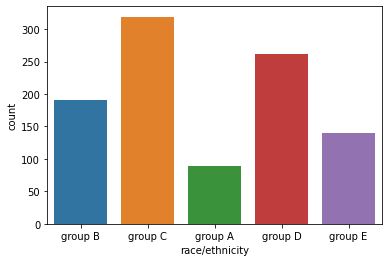

In [22]:
sns.countplot(x='race/ethnicity', data=students)
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in students.columns:
    # Compare if the dtype is object
    if students[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        students[col]=le.fit_transform(students[col])

In [42]:
from sklearn.model_selection import train_test_split
X = students.drop('division', axis=1)
y = students.division
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_train
# X_test

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percent
541,1,3,0,0,0,79,82,80,80.333333
440,0,2,4,1,0,67,81,79,75.666667
482,1,2,4,0,1,68,68,61,65.666667
422,0,3,3,0,0,47,58,67,57.333333
778,0,0,4,1,0,72,79,82,77.666667
...,...,...,...,...,...,...,...,...,...
106,0,3,3,1,1,87,100,100,95.666667
270,1,2,1,1,1,69,63,61,64.333333
860,0,2,0,1,1,53,62,53,56.000000
435,1,2,4,0,0,50,48,53,50.333333


In [47]:
from sklearn.linear_model import LogisticRegression


In [49]:
clf=LogisticRegression()
clf.fit(X_train, y_train)

/home/aman/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
pred_label=clf.predict(X_test)
pred_label

array(['1st division', '2nd division', '2nd division', '2nd division',
       '1st division', '2nd division', '1st division', '2nd division',
       '1st division', '3rd division', '2nd division', '3rd division',
       '1st division', '2nd division', '1st division', '2nd division',
       '2nd division', '2nd division', '3rd division', '2nd division',
       '2nd division', '2nd division', '2nd division', '2nd division',
       '1st division', '2nd division', '2nd division', '2nd division',
       '2nd division', '2nd division', '2nd division', '2nd division',
       '2nd division', '2nd division', '2nd division', '2nd division',
       '2nd division', '2nd division', '1st division', 'Fail',
       '1st division', '2nd division', '2nd division', '2nd division',
       '1st division', '2nd division', '2nd division', '2nd division',
       '1st division', '1st division', '2nd division', '2nd division',
       '1st division', '2nd division', '2nd division', '2nd division',
       '2nd di

In [61]:
labelTest=np.array(y_test)
labelTest

array(['1st division', '2nd division', '2nd division', '2nd division',
       '1st division', '1st division', '2nd division', '2nd division',
       '1st division', '3rd division', '3rd division', 'Fail',
       '1st division', '2nd division', '1st division', '2nd division',
       '3rd division', '3rd division', '2nd division', '2nd division',
       '2nd division', '3rd division', '2nd division', '3rd division',
       '1st division', '1st division', '2nd division', '3rd division',
       '3rd division', '2nd division', '2nd division', '2nd division',
       '2nd division', '2nd division', '1st division', '2nd division',
       '1st division', '2nd division', '2nd division', 'Fail',
       '1st division', '2nd division', '2nd division', '2nd division',
       '1st division', '2nd division', '2nd division', 'Fail',
       '1st division', '1st division', '2nd division', '2nd division',
       '1st division', '2nd division', '2nd division', '2nd division',
       '1st division', '2nd di

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV#this is same as grid search but is is better because it take number of ,no. of combination
knn = KNeighborsClassifier()
para = {'n_neighbors':np.arange(1, 50)}

grid_cv = GridSearchCV(knn, param_grid=para, cv=5)

grid_cv.fit(X_train, y_train)
grid_cv.best_params_




{'n_neighbors': 7}

In [84]:
knn = grid_cv.best_estimator_

knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=7)

In [83]:
print(y_pred==y_test)

521     True
737     True
740     True
660    False
411     True
       ...  
468     True
935     True
428     True
7       True
155     True
Name: division, Length: 300, dtype: bool


In [85]:
y_pred = knn.predict(X_test)

knn.score(X_test, y_test)



0.9666666666666667